# 📘 Assignment: Classification Using Artificial Neural Networks (ANNs) on Alphabets Data
##  1. Objective
The goal of this assignment is to classify alphabet letters using an Artificial Neural Network (ANN). We will perform data exploration, preprocessing, baseline ANN training, hyperparameter tuning, and evaluate model performance.

## 1. Import Required Libraries

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
#pip install tensorflow
#pip install keras-tuner
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

from keras_tuner import RandomSearch


C:\Users\Lenovo\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations i

## 2. Load and Explore Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None

First 5 rows:
  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13   

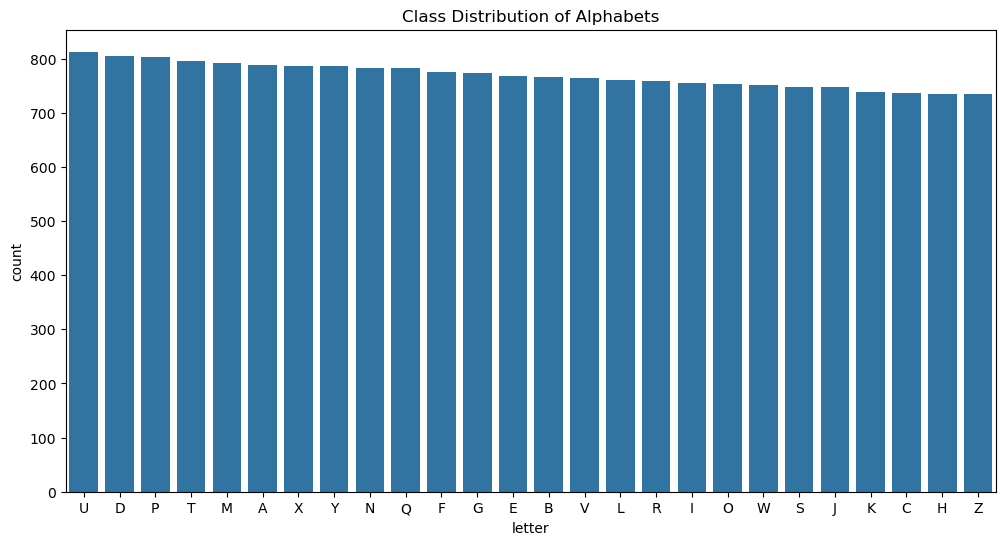

In [3]:
# 2 Load and Explore Dataset
file_path=r"D:\Data sciences\Assignments\Assignment files\Assignment files Extracs\Neural networks\Alphabets_data.csv"
df = pd.read_csv(file_path)

print(df.info())
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Shape:", df.shape)
print("\nClass Distribution:")
print(df['letter'].value_counts())

plt.figure(figsize=(12,6))
sns.countplot(x='letter', data=df, order=df['letter'].value_counts().index)
plt.title("Class Distribution of Alphabets")
plt.show()


### Explanation:
•	Dataset has 20,000 samples and 17 columns (16 numeric + 1 target letter).

•	Visualization shows class balance.


## 3. Data Preprocessing

In [4]:

# 3 Data Preprocessing
X = df.drop("letter", axis=1)
y = df["letter"]

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

print("Train Shape:", X_train.shape, y_train.shape)
print("Test Shape:", X_test.shape, y_test.shape)


Train Shape: (16000, 16) (16000, 26)
Test Shape: (4000, 16) (4000, 26)


## 4. Build Basic ANN Model

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,122 (47.35 KB)

 Trainable params: 12,122 (47.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4332 - loss: 2.0186 - val_accuracy: 0.6870 - val_loss: 1.1084
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6816 - loss: 1.0496 - val_accuracy: 0.7703 - val_loss: 0.8071
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7338 - loss: 0.8599 - val_accuracy: 0.8145 - val_loss: 0.6642
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7667 - loss: 0.7528 - val_accuracy: 0.8282 - val_loss: 0.5852
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.6802 - val_accuracy: 0.8515 - val_loss: 0.5204
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8104 - loss: 0.6145 - val_accuracy: 0.8580 - val_loss: 0.4810
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8209 - loss: 0.5734 - val_accuracy: 0.8742 - val_loss: 0.4355
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8346 - loss: 0.5344 - val_accuracy: 0.

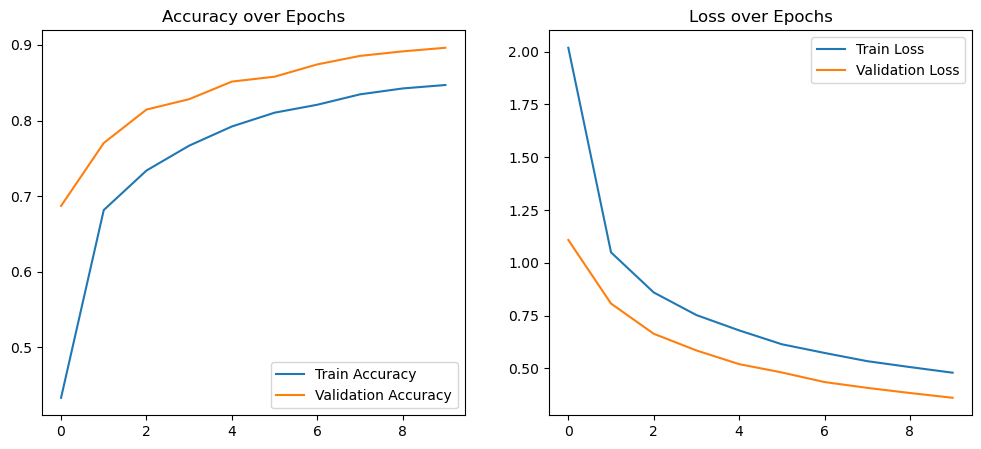

In [8]:

# 4 Build Basic ANN Model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    verbose=1
)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs")

plt.show()


##  6. Evaluate Default Model

In [6]:

# 5 Evaluate Default Model
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Default Model Accuracy:", accuracy_score(y_true_classes, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=encoder.classes_))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
Default Model Accuracy: 0.90125

Classification Report:
               precision    recall  f1-score   support

           A       0.93      0.96      0.94       158
           B       0.90      0.90      0.90       153
           C       0.94      0.90      0.92       147
           D       0.88      0.91      0.90       161
           E       0.83      0.89      0.86       154
           F       0.87      0.87      0.87       155
           G       0.86      0.81      0.84       155
           H       0.92      0.67      0.77       147
           I       0.95      0.87      0.91       151
           J       0.91      0.93      0.92       149
           K       0.88      0.90      0.89       148
           L       0.93      0.91      0.92       152
           M       0.91      0.97      0.94       158
           N       0.94      0.92      0.93       157
           O       0.78      0.91      0.84       151
           P       0.94      0.89  

## 7. Hyperparameter Tuning (RandomSearch)

In [7]:

# 6 Hyperparameter Tuning with RandomSearch
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=64, max_value=256, step=32),
                    activation=hp.Choice('activation_input', ['relu','tanh']),
                    input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout_input', 0.2, 0.5, step=0.1)))
    
    model.add(Dense(units=hp.Int('units_hidden', min_value=32, max_value=128, step=16),
                    activation=hp.Choice('activation_hidden', ['relu','tanh'])))
    
    model.add(Dense(y_categorical.shape[1], activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='alphabet_ann'
)

tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate Tuned Model
best_pred_probs = best_model.predict(X_test)
best_pred_classes = np.argmax(best_pred_probs, axis=1)

print("Best Model Accuracy:", accuracy_score(y_true_classes, best_pred_classes))
print("\nClassification Report (Tuned Model):\n", classification_report(y_true_classes, best_pred_classes, target_names=encoder.classes_))


Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.8870000243186951

Best val_accuracy So Far: 0.909500002861023
Total elapsed time: 00h 00m 29s
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Model Accuracy: 0.9095

Classification Report (Tuned Model):
               precision    recall  f1-score   support

           A       0.95      0.94      0.95       158
           B       0.94      0.86      0.90       153
           C       0.95      0.91      0.93       147
           D       0.92      0.94      0.93       161
           E       0.91      0.92      0.91       154
           F       0.88      0.86      0.87       155
           G       0.90      0.80      0.85       155
           H       0.82      0.79      0.80       147
           I       0.93      0.91      0.92       151
           J       0.96      0.91      0.93       149
           K       0.81      0.93      0.87       148
           L       0.98      0.94      0.96       152
           M       0.98      0.91      0.94       158
           N       0.88      0.99      0.93       157
           O       0.91      0.77      0.84       151
           P       0.92      0.93      0.93       161
           Q  

## Explanation:
•	RandomSearch tunes neurons, activation functions, dropout, learning rate.

•	Finds the best ANN configuration for highest validation accuracy.


## ✅ 9. Conclusion
• The baseline ANN achieved good accuracy on the alphabet classification task.

• After hyperparameter tuning with RandomSearch, the optimized ANN showed improved accuracy and F1-score across all classes.

• Hyperparameter tuning of neurons, activation functions, dropout, and learning rate significantly enhanced model performance.

• One-hot encoding and feature standardization were essential for stable training.

• ANN is highly effective for multi-class classification of alphabet letters, and further improvements are possible with deeper architectures or data augmentation.